# Determinação do Cíclo Magnético Solar por Transformada de Fourier
* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 07/2020

O Objetivo desse `Notebook`  não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.

# Introdução

O Campo magnético estelar sempre foi um dos grandes problemas da astrofísica historicamente. Nesse `Notebook` não vamos nos aprofundar em aspectos físicos dos Campos magnéticos estelares, mas abordar mais diretamente, um efeito de mais quantitativo relacionado a atividade magnética estelar, as manchas solares.

De um ponto de vista histórico, as manchas solares foram observadas, inclusive por Galileu Galilei. As observações de Galileu aparecem como uma dos mais primitivos registros das manchas solares. De primeira impressão, Galileu afirmou que as manchas eram na verdades como nuvens da atmosfera solar. Pensamento de certa forma coerente, levando em conta a época da observação. 

![texto alternativo](https://i.imgur.com/d3cFioN.png)

Nessa imagem, podemos ver bem as manchas solares, e ter uma noção da sua magnitude ao comparar com jupter e com a terra.

Para esse `Notebook` vamos usar dos dados da históricos da NASA de número de manchas solares. Esses dados agrupam informações da atividade magnética solar desde 1749. Você pode não só baixar os dados aqui em uso mas também obter outras informações sober o cíclo magnético solar [nesse site](https://solarscience.msfc.nasa.gov/SunspotCycle.shtml) .

# Importando as principais bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Agora, vamos carregar os dados que baixamos do site da NASA, para isso, bastar usar a função `loadtxt` do `numpy` e fornecer o nome do arquivo que desejamos carregar. Lembrando que isso só funciona se o arquivo estiver nos mesmo diretório que o nosso executável. Caso queira navegar para outros diretórios, também é possivel, usando por exemplo `/` para entrar em uma pasta. 

In [2]:
dados = np.loadtxt("sunspots.txt")

Do arquivo que baixamos da NASA, vamos usar apenas 2 colunas, a terceira e a quarta que são referentes a data da observação e o respectivo numero de manchas observados. Para isso, dar `slice` da seguinte forma:

In [3]:
tempo = dados[:,2]
n_manchas = dados[:,3]

Relembrando, o símbolo `:` em slices quer dizer "tudo". Então ao fazer `dados[:,2]`, estamos selecionando todas as linhas da terceira coluna (terceira porque no python a primeira coluna é a coluna 0).

Vamos plotar, para ter uma noção de como são os dados:


<function matplotlib.pyplot.show(*args, **kw)>

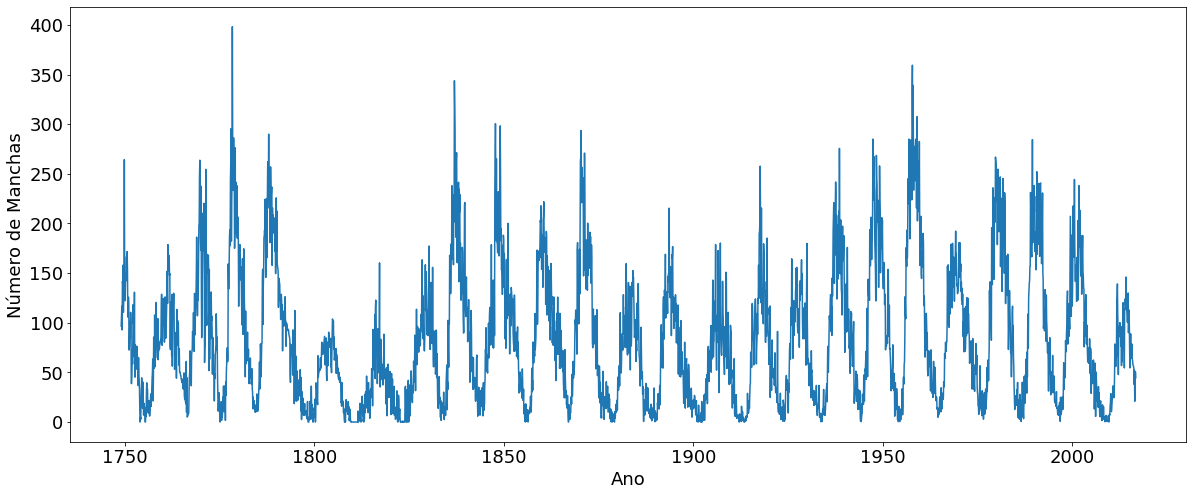

In [4]:
fig = plt.figure(figsize=(20,8))
plt.plot(tempo,n_manchas)
plt.xlabel("Ano",fontsize=18)
plt.ylabel("Número de Manchas",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show

Visualmente, ja conseguimos identificar um padrão periódico bem definido nas observações.

# Transformada discreta de Fourier

Relembrando , sabemos que toda função $f(x)$ pode ser reescrita por uma serie de fourier que nada mais é do que uma serie de somas de senos e cossenos em um intervalo de $ 0<x<L $. Da seguinte forma: 


$$ f(x) = \sum_{k=0}^{\infty} \alpha_{k} cos \left( \frac{2 \pi k x}{L} \right) + \sum_{k=1}^{\infty} \beta_{k} sen \left( \frac{2 \pi k x}{L} \right)$$

Onde $ \alpha_{k} $ e $ \beta_{k} $ são os coeficeintes de Fourier

Usandos as definicões exponencias de Seno e Cosseno, é possível reescrever a expressão acima da seguinte forma:


$$ f(x) = \sum_{k=-\infty}^{\infty} \gamma_{k} exp \left( i\frac{2 \pi k x}{L} \right) $$


Onde os $ \gamma_{k} $ são os coeficientes de fourier


A demonstração completa, passo a passo, pode ser encontrada em [1], mas a transformada discreta de fourier termina da seguinte forma:

$$ \gamma_{k} = \frac{1}{N} \sum_{n=0}^{N-1} y_{n} exp \left( -i\frac{2 \pi k n}{N} \right)$$

Onde $N$ é o tamnho da amostra, $y_{n}$ é o valor da função no n-ésimo ponto.

As vezes, pode ser comum encontrar na literatura deixar o fator normalizador $\frac{1}{N}$ de lado na implementação dos algorítimo mas levando-o em conta no final. Vamos também usar dessa notação, ficando com:


$$ c_{k} = \sum_{n=0}^{N-1} y_{n} exp \left( -i\frac{2 \pi k n}{N} \right)$$

implementando essa Equação, temos:

In [5]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

Aplicando a função definida em nossos pontos:

In [6]:
coef = list(dft(n_manchas))

Vamos plotar o gráfico do espectro de potencia dos coeficientes para ver o resultado:

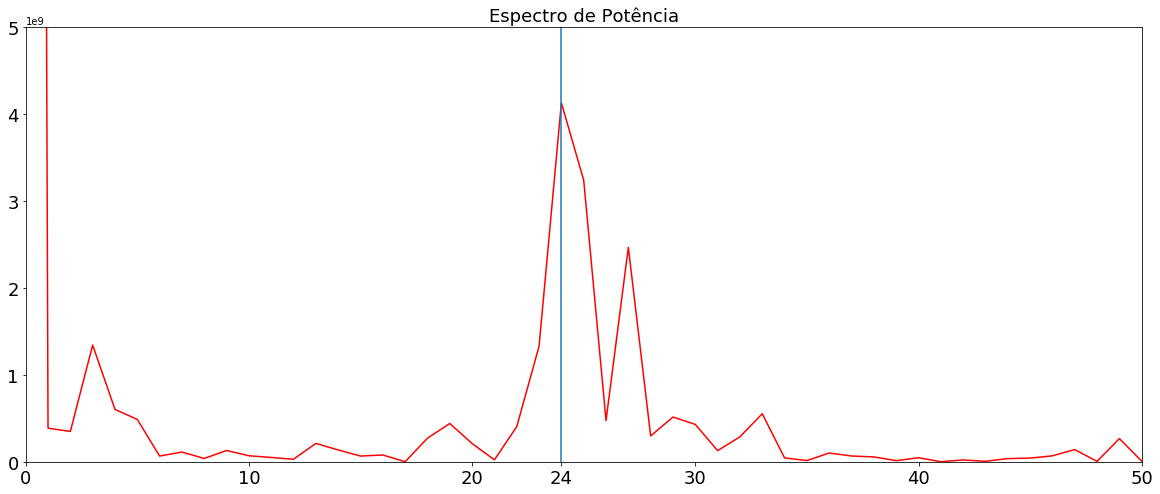

In [7]:
fig = plt.figure(figsize=(20,8))
plt.plot(abs(np.array(coef)**2),"r")
plt.xlim(1,50)
plt.ylim(0,5e9)
plt.axvline(24)
plt.xticks(list(plt.xticks()[0]) + [24],fontsize=18)
plt.yticks(fontsize=18)
plt.title("Espectro de Potência",fontsize=18)
plt.show()

Podemos ver um pico em 24, com isso. Levando em conta o fator de normalização $N$. E já invertando para obter o período ao invés da frequencia, temos:

$$ \frac{N}{k} = \frac{3143}{24} = 130 \:\text{messes} \cong 11 \: \text{anos} $$ 

# Referencias:
* [1] Mark Newman-Computational Physics (2013,University of Michigan)
* Imagens usadas de domínio público da NASA